## One day (03-03-2012) of riometer data - graph

### Open file

In [1]:
import datetime

# Define lists
date = [] #do i even need the date cause it's the same year?
time = []
absorption = []
raw_sig = []
absp_string = []

# Define filename
filename = "RD 2012-03-03.txt"

# open file to read
fp = open(filename, 'r')

# Define "line" to skip last line cause it's 24:00:02 which doesn't make sense
#line = fp.readline()
#line = line[:-1]

for line in fp:
    # skip comments
    if line[0] == "#" or line[27] == "N" or line[23] == "*":
        continue
    else:
        #print(line)
        # strip line
        line_strip = line.strip()
        # split lines into lists
        line_split = line.split()

        # Define datetime format for time
        format = "%H:%M:%S"
        format_day = "%d/%m/%Y"

        # Try-except to see if can convert to datetime
        try:
            absorption.append(float(line_split[2]))
            # Only append line to list if time checks true
            res = bool(datetime.datetime.strptime(line_split[1], format))
            this_time = datetime.datetime.strptime(line_split[1], format)
            time.append(this_time)
    
            # append raw signals to array
            raw_sig.append(float(line_split[3]))
            
        except ValueError:
            res = False

print("length of time list:", len(time))
print("length of absp list:", len(absorption))
print("length of raw sig list:", len(raw_sig))


print("Absorption at 500th index: ", absorption[500])
print("Min absp: ", min(absorption))
print("Max absp: ", max(absorption))

fp.close()

length of time list: 17141
length of absp list: 17141
length of raw sig list: 17141
Absorption at 500th index:  0.733
Min absp:  -1.524
Max absp:  154.258


### Max's plot - absp vs time

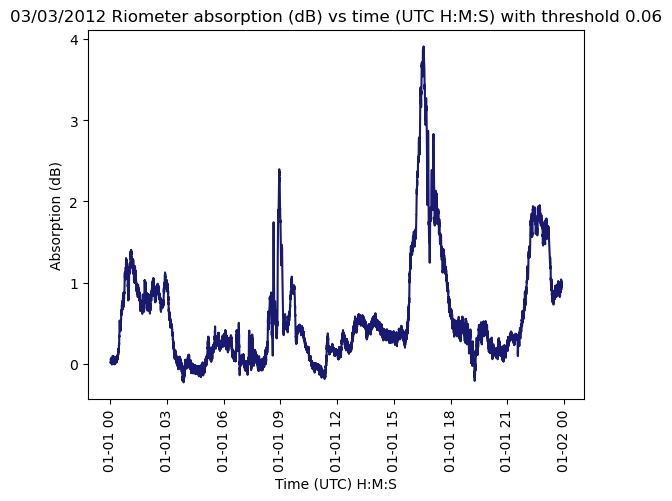

In [8]:
import matplotlib.pyplot as plt
def filter_spikes(times, absorptions, threshold, neighbor_count=10):
    """
    Filter out absorption spikes where the value is greater than a threshold relative to the average of its neighbors.
    """
    filtered_times = []
    filtered_absorptions = []

    for i in range(len(absorptions)):
        # Determine the range for neighbors
        start_index = max(i - neighbor_count, 0)
        end_index = min(i + neighbor_count + 1, len(absorptions))

        # Calculate the average of neighboring values
        neighbor_avg = sum(absorptions[start_index:end_index]) / (end_index - start_index)

        # Check if the current value is within the threshold relative to the neighbor average
        if abs(absorptions[i] - neighbor_avg) <= threshold:
            filtered_times.append(times[i])
            filtered_absorptions.append(absorptions[i])
    
    def plot(filtered_times, filtered_absorptions):
        plt.plot(filtered_times, filtered_absorptions, color="midnightblue")
        plt.title("03/03/2012 Riometer absorption (dB) vs time (UTC H:M:S) with threshold 0.06")
        plt.xlabel("Time (UTC) H:M:S", fontsize=10)
        plt.xticks(rotation=90)
        plt.ylabel("Absorption (dB)", fontsize=10)
       
    return plot(filtered_times, filtered_absorptions)

threshold = 0.06
filter_spikes(time, absorption, threshold, neighbor_count=10)

### Max's Plot - Raw signal vs time 

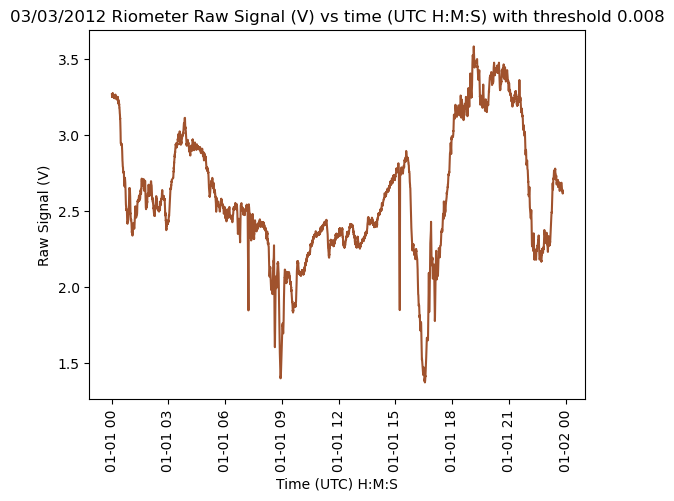

In [14]:
def filter_spikes(times, rawsignals, threshold, neighbor_count=10):
    """
    Filter out absorption spikes where the value is greater than a threshold relative to the average of its neighbors.
    """
    filtered_times = []
    filtered_rawsignals = []

    for i in range(len(rawsignals)):
        # Determine the range for neighbors
        start_index = max(i - neighbor_count, 0)
        end_index = min(i + neighbor_count + 1, len(rawsignals))

        # Calculate the average of neighboring values
        neighbor_avg = sum(rawsignals[start_index:end_index]) / (end_index - start_index)

        # Check if the current value is within the threshold relative to the neighbor average
        if abs(rawsignals[i] - neighbor_avg) <= threshold:
            filtered_times.append(times[i])
            filtered_rawsignals.append(rawsignals[i])
    
    def plot(filtered_times, filtered_rawsignals):
        plt.plot(filtered_times, filtered_rawsignals, color="sienna")
        plt.title("03/03/2012 Riometer Raw Signal (V) vs time (UTC H:M:S) with threshold 0.008")
        plt.xlabel("Time (UTC) H:M:S", fontsize=10)
        plt.xticks(rotation=90)
        plt.ylabel("Raw Signal (V)", fontsize=10)
       
    return plot(filtered_times, filtered_rawsignals)

threshold = 0.008
filter_spikes(time, raw_sig, threshold, neighbor_count=10)